# Problem Set 7

In [2]:
import numpy as np    
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import fsolve, minimize
from scipy import integrate

In [67]:
import warnings
warnings.filterwarnings('ignore')

Problem 1 <br>
a.Say, you have the equation system, given by x+0.5y-2=0 and 4x+5y=2. Write this upin matrix notation and solve the system using matrix inversion in Python. <br> b.Try to do the same with the following equation system: x+2y -4= 0 and 5x+10y = 2. What happens? <br>c.The function f(a) is implicitly defined by the x that solves the equation ax - exp(x) = 0. Define the function using a call to a solver from the Scipy library and plot the function.<br> d.The function f(a) is implicitly defined by the x that maximizes exp(-0.5x^2)+ax. Definethe function using a call to a minimizer from the Scipy library and plot the function.

In [3]:
e = np.array([[1,0.5],[4,5]])
sol = np.array([[2],[2]])
x = np.linalg.inv(e) @ sol
print(x)
print(e @ x)

[[ 3.]
 [-2.]]
[[2.]
 [2.]]


In [4]:
e = np.array([[1,2],[5,10]])
sol = np.array([[4],[2]])
x = np.linalg.inv(e) @ sol
print(x)
print(e @ x) 

[[ 6.48518346e+16]
 [-3.24259173e+16]]
[[0.]
 [0.]]


We can see that in this case the solution provided doesn't give the right result. 

[-276.10007928]


C:\Users\malag\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


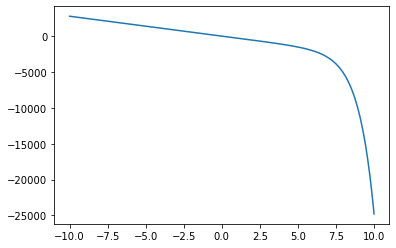

In [5]:
from scipy.optimize import fsolve
xs = np.linspace(-10,10,1000)
f = lambda x,a =0: a*x - np.exp(x) 
a = fsolve(f, 0)
print(a)

plt.plot(xs,f(xs,a)) ; plt.show()

[1.34217728e+08]


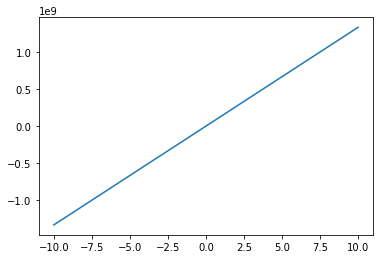

In [6]:
# f = lambda x,a=1: np.exp(-0.5*np.power(x,2))+a*x
# x = np.linspace(0.1,10,90) ; ast = np.arange(0.1,1,0.01)  ; anse = []
# for a in range(len(ast)):
#     ans = minimize(lambda x,a : -f(x,a),0).x
#     anse.append(ans)

# plt.plot(x, f(x,anse))

xs = np.linspace(-10,10,1000)
f = lambda x,a =0: np.exp(-0.5*np.power(x,2))+a*x
a = fsolve(f, 0)
print(a)

plt.plot(xs,f(xs,a)) ; plt.show()

[1.34217728e+08]
[-0.]
[0.]


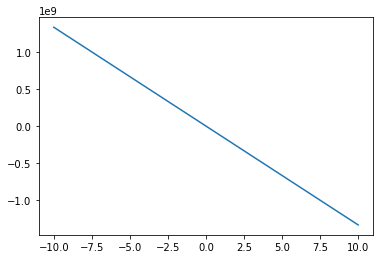

In [7]:
def f(y,a = 0):
    return -(np.exp(-0.5*np.power(y,2))+a*y)
a=fsolve(f,0)
print(a)
print(f(a))
plt.plot(xs, f(xs,a))

b = minimize(f,0).x
print(b)

[0. 0.]
-1.0


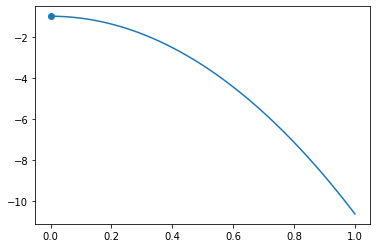

In [8]:
import scipy.optimize as optimize

a = np.linspace(0,10,100) ; x = np.linspace(0,1,100) ; pa = [a,x]

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a = params[0] ; x = params[1] # <-- for readability you may wish to assign names to the component variables
    return -(np.exp(-0.5*np.power(x,2))+a*x)

initial_guess = [0, 0]
result = optimize.minimize(f, initial_guess, method = 'BFGS')
if result.success:
    fitted_params = result.x
    print(fitted_params)
    print(result.fun)
else:
    raise ValueError(result.message)

plt.plot(x, f(pa))
plt.scatter(result.x[0], f(result.x))

## Problem 2
In this problem, we are going to work with two utility functions: $$u1 = 0.6 \times log(x) + 0.4 \times log(y) $$
$$u2 = y + 1/(1+\frac{1}{e} ) \times x^{(1+ \frac{1}{e} )} $$
Derive a demand curve (for good x as a price of x for each of the utility functions). Assume that income = 10 and the price of good y is 1. <br> We will consider a price change from 1 to 2 on good x. <br>
Our problem concerns how to measure the cost to the consumer (the welfare consequences) of the price change. (Thereason this is not trivial is that the consumer can adjust demand, right!)

<u>Case A:</u> $u1 = 0.6 \times log(x) + 0.4 \times log(y) $ 

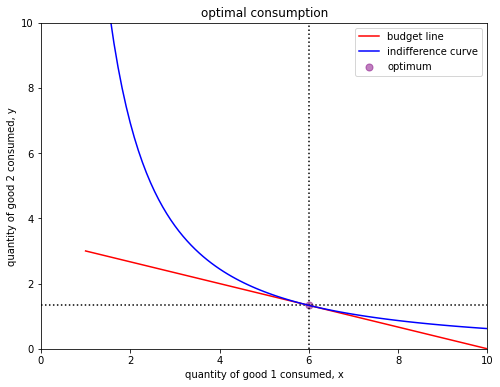

In [9]:
def utility_1(x, y): 
    # -u(x, y) since we minimise later
    return - 0.6*np.log(x) - 0.4*np.log(y)

def utility_budget_1(x, mylist):
    income = mylist[0] ; price_x = mylist[1] ; price_y = mylist[2]
    y = (income - price_x*x)/price_y
    return utility_1(x, y)
    
def demand_1(income, price_x, price_y): 
    x = opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, price_x, price_y], )).x
    y = (income - price_x*x)/price_y
    return x, y

def indiff_dist_1(y, mylist): 
    x = mylist[0] ; utility_level = mylist[1]
    utility_achieved = utility_1(x, y)
    return utility_achieved - utility_level

def indifference_1(x, u_bar):
    result = opt.newton(indiff_dist_1, 0.1, args = ([x, u_bar], ))
    return result

def indirect_utility_1(income, price_x, price_y): 
    x, y = demand_1(income, price_x, price_y)
    return utility_1(x, y)

# initialise quantiites of good 1 (x), income (I), and prices of the two goods
x = np.linspace(1, 10, 100) ; I = 10 ; p1 = 1 ; p2 = 3

# get indirect utility curve here
utility_level = indirect_utility_1(I, p1 , p2)
y = np.zeros((100, 1))

for element in range(len(x)):
    y[element] = indifference_1(x[element], utility_level)

# plot the consumer's budget and indifference curve
plt.figure(figsize = (8, 6))
plt.plot(x, I/p2 - x*p1/p2, color = 'red', label = 'budget line')
plt.plot(x, y, color = 'blue', label = 'indifference curve') 

# identify optimum
x_star = demand_1(I, p1, p2)[0] ; y_star = demand_1(I, p1, p2)[1]
plt.scatter(x_star, y_star, s=50, alpha=0.5, color = 'purple', label = 'optimum')
plt.vlines(x_star, 0, 35, linestyles = 'dotted', color = 'k')
plt.hlines(y_star, 0, 30, linestyles = 'dotted', color = 'k')

plt.xlabel('quantity of good 1 consumed, x') ; plt.ylabel('quantity of good 2 consumed, y')
plt.title('optimal consumption') ; plt.legend(loc = 'upper right')
plt.ylim(0, 10) ; plt.xlim(0, 10) ; plt.show()

<ipython-input-9-d76a77c8a85f>:3: RuntimeWarning: invalid value encountered in log
  return - 0.6*np.log(x) - 0.4*np.log(y)
C:\Users\malag\anaconda3\lib\site-packages\scipy\optimize\optimize.py:708: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\Users\malag\anaconda3\lib\site-packages\scipy\optimize\optimize.py:719: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\Users\malag\anaconda3\lib\site-packages\scipy\optimize\optimize.py:724: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:


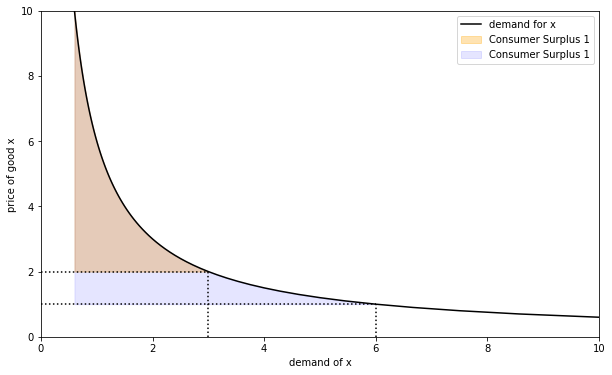

36.00000000000026 18.000000000000128


In [10]:
n = 100
prices_x = np.linspace(0.1, 10, n) ; price_y = 1 ; income = 10
demandx = np.zeros(n) ; demandy = np.zeros(n)

def demandX(pricex):
    for price in range(n):
        demandx[price], demandy[price] = demand_1(income, prices_x[price], price_y)
    return demandx

demandx = demandX(prices_x)

plt.figure(figsize = (10, 6))
plt.plot(demandx,prices_x, '-k', label = 'demand for x')

idx1 = np.argwhere(prices_x == 1) ; idx2 = np.argwhere(prices_x == 2)
d1 = demand_1(income, prices_x[idx1], price_y) ; d2 = demand_1(income, prices_x[idx2], price_y) #does it mean that demand is the same ?
plt.vlines(d1[0], 0, 1, color = 'black', linestyle = 'dotted') ; plt.hlines(1, 0, 6, color = 'black', linestyle = 'dotted') #why do you have the dotter lines ?
plt.vlines(d2[0], 0, 2, color = 'black', linestyle = 'dotted') ; plt.hlines(2, 0, 3, color = 'black', linestyle = 'dotted')

# fill_between

plt.fill_between(demandx, 2, prices_x, where = (prices_x >= 1) & (prices_x >=2),
                 color = 'orange', alpha = 0.3, label = "Consumer Surplus 1")
plt.fill_between(demandx, 1, prices_x, where = (prices_x >= 1),
                 color = 'blue', alpha = 0.1, label = "Consumer Surplus 1")


plt.xlabel('demand of x') ; plt.ylabel('price of good x') ; plt.legend()
plt.ylim(0, 10) ; plt.xlim(0, 10) ; plt.show()


#compute the consumer surplus using integrate
CS1 = integrate.quad(lambda x: opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, 1, price_y], )).x, 0, d1[0])[0]
CS2 = integrate.quad(lambda x: opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, 1, price_y], )).x, 0, d2[0])[0]

print(CS1, CS2)

<u> Case B: </u> $u2 = y + 1/(1+\frac{1}{e} ) \times x^{(1+ \frac{1}{e} )} $

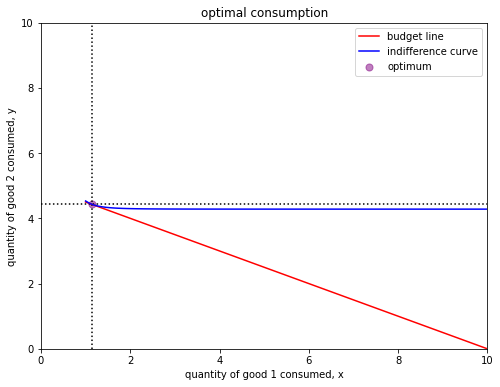

In [11]:
def utility_2(x, y): 
    # -u(x, y) since we minimise later
    pot = (1+1/(-e))
    return -y - (1/pot)*x**(pot)

def utility_budget_2(x, mylist):
    income = mylist[0] ; price_x = mylist[1] ; price_y = mylist[2]
    y = (income - price_x*x)/price_y
    return utility_2(x, y)
    
def demand_2(income, price_x, price_y): 
    x = opt.minimize(utility_budget_2, 0.1, method = 'Nelder-Mead', args = ([income, price_x, price_y], )).x
    y = (income - price_x*x)/price_y
    return x, y

def indiff_dist_2(y, mylist): 
    x = mylist[0] ; utility_level = mylist[1]
    utility_achieved = utility_2(x, y)
    return utility_achieved - utility_level

def indifference_2(x, u_bar):
    result = opt.newton(indiff_dist_2, 1, args = ([x, u_bar], ))
    return result

def indirect_utility_2(income, price_x, price_y): 
    x, y = demand_2(income, price_x, price_y)
    return utility_2(x, y)

# initialise quantiites of good 1 (x), income (I), and prices of the two goods
x = np.linspace(1, 10, 100) ; I = 10 ; p1 = 1 ; p2 = 2 ; e = 0.2

# get indirect utility curve here
utility_level = indirect_utility_2(I, p1 , p2)
y = np.zeros((100, 1))

for element in range(len(x)):
    y[element] = indifference_2(x[element], utility_level)

# plot the consumer's budget and indifference curve
plt.figure(figsize = (8, 6))
plt.plot(x, I/p2 - x*p1/p2, color = 'red', label = 'budget line')
plt.plot(x, y, color = 'blue', label = 'indifference curve') 

# identify optimum
x_star = demand_2(I, p1, p2)[0] ; y_star = demand_2(I, p1, p2)[1]
plt.scatter(x_star, y_star, s=50, alpha=0.5, color = 'purple', label = 'optimum')
plt.vlines(x_star, 0, 35, linestyles = 'dotted', color = 'k')
plt.hlines(y_star, 0, 30, linestyles = 'dotted', color = 'k')

plt.xlabel('quantity of good 1 consumed, x') ; plt.ylabel('quantity of good 2 consumed, y')
plt.title('optimal consumption') ; plt.legend(loc = 'upper right')
plt.ylim(0, 10) ; plt.xlim(0, 10) ; plt.show()

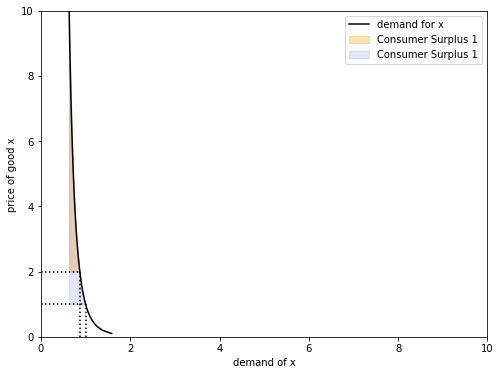

6.00000000000004 5.223281250000035


In [12]:
n = 100
prices_x = np.linspace(0.1, 10, n) ; price_y = 1 ; income = 10
demandx = np.zeros(n) ; demandy = np.zeros(n)

def demandX(pricex):
    for price in range(n):
        demandx[price], demandy[price] = demand_2(income, prices_x[price], price_y)
    return demandx

demandx = demandX(prices_x)

plt.figure(figsize = (8, 6))
plt.plot(demandx,prices_x, '-k', label = 'demand for x')

idx1 = np.argwhere(prices_x == 1) ; idx2 = np.argwhere(prices_x == 2)
d1 = demand_2(income, prices_x[idx1], price_y) ; d2 = demand_2(income, prices_x[idx2], price_y) #does it mean that demand is the same ?
plt.vlines(d1[0], 0, 1, color = 'black', linestyle = 'dotted') ; plt.hlines(1, 0, d1[0], color = 'black', linestyle = 'dotted') #why do you have the dotter lines ?
plt.vlines(d2[0], 0, 2, color = 'black', linestyle = 'dotted') ; plt.hlines(2, 0, d2[0], color = 'black', linestyle = 'dotted')

# fill_between

plt.fill_between(demandx, 2, prices_x, where = (prices_x >= 1) & (prices_x >=2),
                 color = 'orange', alpha = 0.3, label = "Consumer Surplus 1")
plt.fill_between(demandx, 1, prices_x, where = (prices_x >= 1),
                 color = 'blue', alpha = 0.1, label = "Consumer Surplus 1")


plt.xlabel('demand of x') ; plt.ylabel('price of good x') ; plt.legend()
plt.ylim(0, 10) ; plt.xlim(0, 10) ; plt.show()


#compute the consumer surplus using integrate
CS1 = integrate.quad(lambda x: opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, 1, price_y], )).x, 0, d1[0])[0]
CS2 = integrate.quad(lambda x: opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, 1, price_y], )).x, 0, d2[0])[0]

print(CS1, CS2)

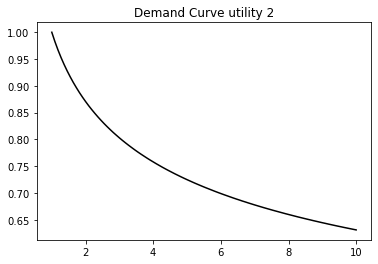

In [13]:
n = 100
prices_x = np.linspace(1, 10, n) ; price_y = 1 ; income = 10 ; e = 0.2
demandx = np.zeros(n) ; demandy = np.zeros(n)

for price in range(n):
    demandx[price], demandy[price] = demand_2(income, prices_x[price], price_y)
    
plt.plot(prices_x, demandx, '-k', label = 'demand for x') ; plt.title("Demand Curve utility 2") ;plt.show()

b.Compute the “equivalent variation” for both utility functions. (How much would theconsumer be willing to pay to not experience the price increase?) <br>
c.Compute the “compensating variation” for both utility functions. (How much do youneed to compensate the consumer for the price change to keep her equally happy?)

<u>Case A:</u> $u1 = 0.6 \times log(x) + 0.4 \times log(y) $ 

In [14]:
# FOR THE FIRST UTILITY FUNCTION
def diff_indirect_utilities(income_to_be_found,longlist):
    income1 = longlist[0]
    px1 = longlist[1] ; py1 = longlist[2]
    px2 = longlist[3] ; py2 = longlist[4]
    return indirect_utility_1(income_to_be_found,px2,py2) - indirect_utility_1(income1, px1, py1)

# define the things we need
I = 10 ; pricex_1 = 1 ; pricey_1 = 1 ; pricex_2 = 2 ; pricey_2 = 1 

'''So this should find the income level that would together with prices 1 and 1 (the last two arguments)
 would give the same utility as an income level of 10, together with prices 2 and 1'''
a = opt.newton(diff_indirect_utilities, 1, args = ([I, pricex_1, pricey_1, pricex_2, pricey_2], ))
print(a) ; print(f"Compensation for welfare loss : {10 -a}")

[15.15716567]
Compensation for welfare loss : [-5.15716567]


<u> Case B: </u> $u2 = y + 1/(1+\frac{1}{e} ) \times x^{(1+ \frac{1}{e} )} $

In [15]:
# FOR THE SECOND UTILITY FUNCTION
def diff_indirect_utilities_2(income_to_be_found,longlist):
    income1 = longlist[0]
    px1 = longlist[1] ; py1 = longlist[2]
    px2 = longlist[3] ; py2 = longlist[4]
    return indirect_utility_2(income1, px1, py1) - indirect_utility_2(income_to_be_found,px2,py2)

# define the things we need
income = 10 ; pricex_1 = 1 ; pricey_1 = 1 ; pricex_2 = 2 ; pricey_2 = 1 

'''So this should find the income level that would together with prices 1 and 1 (the last two arguments)
 would give the same utility as an income level of 10, together with prices 2 and 1'''
a = opt.newton(diff_indirect_utilities_2, 1, args = ([income, pricex_1, pricey_1, pricex_2, pricey_2], ))
print(a) ; print(f"Compensation for welfare loss : {I -a}")

[10.92637641]
Compensation for welfare loss : [-0.92637641]


## Problem 3

We will be spinning further on the Fisher model from the session 5 problems. We will now include production in the model. Our worker will supply one unit of labor every period. He starts with capital $k1$. Production is given by the Cobb-Douglas production function 
$$ F(L,K)=L^{0.6}K^{0.4} $$
The worker produces $F(1,k1)$ in the first period. He can then choose to consume this or save for the next period. In the second period $k2 = k1 (1-delta) + s$, where $s=F(1,k1) - c1$
Now, 
* s is savings
* delta is depreciation of capital.
* Consumption in period 2 is given by $F(1,k2)+k2$. (That is, since this is the last period, the worker will also consume the capital). 
<u> The worker’s preferences are the same as in Session 5, problem 1. </u>

##### part(a). 
*The worker in this model only needs to work out how much to save/invest. Implement this model so you can solve it numerically.*

In [116]:
def carrots(arglist, e = 0.1, q = 0.04, r = 0):

    #Step 0: Define parameters, here we have default values for e, q and r
    K1 = arglist[0] ; delta = arglist[1] ; alpha = arglist[2]
    x = np.linspace(0.1,3,100) ; savings = np.zeros(len(x))
    y = np.zeros(len(x))
    
    #Step 1: Define functions to calculate production and the endownments. Also have a function to define
    # capital for the second period. 
    def production(labour, capital):
        return np.power(labour, alpha)*np.power(capital, 1 - alpha)

    def capital2(c1, delta, K1):
        return (K1) * (1 - delta) + production(1,K1) - c1
    
    K2 = capital2(x,delta,K1) ; I1 = production(1,K1) ; I2 = production(1,K2[0])

    #Step 2: Define utility and equivalent demand
    def utility(x, y):
        '''Returns the utility level of a given consumptino bundle'''
        return  x**e + (y**e)/(1+q)

    def utility_budget(x, mylist):
        '''Returns the utility level given the budget constraint'''
        endow1 = mylist[0] ; endow2 = mylist[1] ; r = mylist[2]
        y = endow2 + (endow1 - x)*(1 + r)
        return - utility(x, y) 

    def demand(endow1, endow2, r):
        '''Returns the demand of the good given consumption is maximised'''
        x = opt.minimize(utility_budget, 0.1, args = ([endow1, endow2, r], )).x
        y = endow2 + (endow1 - x)*(1 + r)
        return x, y

    #Step 3: Calculate indifference and indirect utility
    def indiff_dist(y, mylist): 
        '''Returns the distance between given utility level and utility of this combinaiton of consumption'''
        x = mylist[0] ; utility_level = mylist[1]
        utitility_achieved = utility(x,y) 
        return utitility_achieved - utility_level

    def indifference(x, util):
        '''Returns the consumer's maximum utility level; the x-intercept of the indifference distace curve'''
        return fsolve(indiff_dist, 1, args = ([x,util], ))

    def indirect_utility(endow1, endow2, r):
        '''Returns the utility as a funciton of the prices and income when the consumer chooses consumption_t1 and
        consumption_t2 to maximise his utility''' 
        x, y = demand(endow1, endow2, r)
        return utility(x, y)

    #Step 4: Compute savings values and indifference for consumption in period 2
    for idx in range(len(x)):
        savings[idx] = production(1, K2[idx]) - x[idx] - delta*K1

    # get indirect utility curve 
    utility_level = indirect_utility(I1, I2, r)

    for element in range(len(x)):
        y[element] = indifference(x[element], utility_level)

    # Step 5: Plot the indifference curve of interporal consumption and the budget line. 
    plt.figure(figsize = (10,6))
    plt.plot(x, I2 + (I1 - x)*(1 + r), color = 'red', label = 'intertemporal budget line')
    plt.plot(x, y, color = 'blue', label = 'intertemporal indifference curve') 
    x_star = demand(I1, I2, r)[0] ; y_star = demand(I1, I2, r)[1]
    plt.scatter(x_star, y_star, s=50, alpha=0.5, color = 'purple', label = 'optimum')
    plt.xlabel('consumption today, x') ; plt.ylabel('consumption tomorrow, y')
    plt.title('optimal consumption over two time periods') ; plt.legend(loc = 'upper right')
    plt.show()

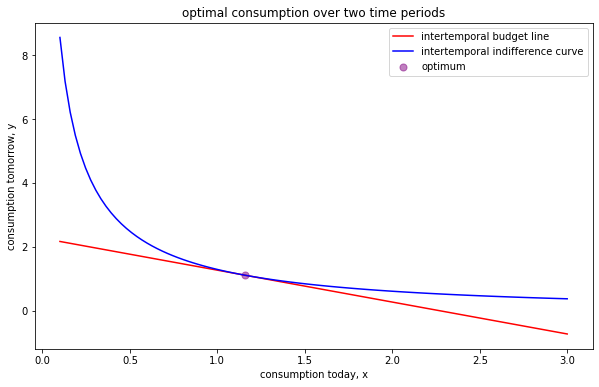

In [117]:
carrots([1,0.1,0.6])

## Problem 4: some more on monopolists/oligopolist

We learnt about monopoly. We are now going to have a market with a consumer demand curve and two or more producers. 

We start out with two. They will have capital stocks k1 and k2, and they produce using labor bought on a competetive market with wage w. Their production functions are 
$$ F(l,k)=l^{0.7}k^{0.3} $$
The goods are homogeneous, so the producers will have to sell at the same price. Therefore, it is easiest to model their quantity decisions. They do take into account that the quantity they produce may affect the price. The firms do not take into account that their behavior may affect the behavior of other firms.

*Hint*: The oligopolist does not take into account the behavior of others, but he does take into account the production of others. Therefore, the production of oligopolist number 1 depends on the production of oligopolist number 2 etc. So this is really a system of equations:
* Solve this by assuming some starting values for production. * Then solve for the production of oligopolist number 1, given the production of oligopolist number 2. 
* Then solve for the production of oligopolist number 2, given the production of oligopolist number 1. 

If you do this four or five times, the production quantities will converge.

The consumers in this market has quasi-linear utility functions and the market demand function (here with price as a function of quantity) is given by 
$$ p = D(x) = A \times x^{-0.5} $$


##### part(a). 
*Implement the model numerically.*

In [22]:
def prod(kap, lab):
    alpha = 0.7
    return lab**alpha * kap**(1 - alpha)

def profits_olig(lab, other_supply, k, w):
    x = prod(k, lab)
    price = (other_supply + x)**(-0.5)
    profits = price*x - w*lab
    return -profits # since we minimise

def supply(other_supply, k, w):
    results = opt.minimize(profits_olig, 2, args = (other_supply, k, w), method = 'Nelder-Mead')
    lab = results.x
    
    x = prod(k, lab)
    return x, lab

def market_outcome(k1, k2, w):
    # starting values
    supply1 = 1 ; supply2 = 1
    
    for k in range(10):
        supply1, lab1 = supply(supply2, k1, w)
        supply2, lab2 = supply(supply1, k2, w)
        
    price = (supply1 + supply2)**(-0.5)
    return supply1, supply2, lab1, lab2, price

def market_outcome_system(supplies, k1, k2, w):
    supply0, lab0 = supply(supplies[1], k1, w)
    supply1, lab1 = supply(supplies[0], k2, w)
    
    out = np.zeros(2)
    out[0] = supply0 - supplies[0]
    out[1] = supply1 - supplies[1]
    return out


a = market_outcome_system((1, 1), 1, 1, 0.5)
print(a)

[-0.30573937 -0.30573937]


<ipython-input-22-1c6c2d593723>:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)
C:\Users\malag\anaconda3\lib\site-packages\scipy\optimize\optimize.py:708: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\Users\malag\anaconda3\lib\site-packages\scipy\optimize\optimize.py:719: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\Users\malag\anaconda3\lib\site-packages\scipy\optimize\optimize.py:724: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:


In [23]:
# function for finding the supply given capital
def market_outcome(k1, k2, w):
    res = opt.root(market_outcome_system, np.array((0.5, 0.5)), args = (k1, k2, w)).x
    return res

market_outcome(1.4, 1.8, 0.5)

<ipython-input-22-1c6c2d593723>:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)


array([0.83545362, 0.96243278])

In [24]:
# evalute the function at these values and check that it is close to zero
market_outcome_system(np.array([0.83545362, 0.96243278]), 1.4, 1.8, 0.5)

<ipython-input-22-1c6c2d593723>:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)


array([ 1.02522346e-09, -3.79716747e-09])

##### part(b). 
*Figure out how quantities and profits depend on k1 and k2 (and compare the quantities to how much the firms would produce if they were price takers in the product market).*

<ipython-input-22-1c6c2d593723>:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)
C:\Users\malag\anaconda3\lib\site-packages\scipy\optimize\optimize.py:712: RuntimeWarning: invalid value encountered in less
  if fxe < fxr:


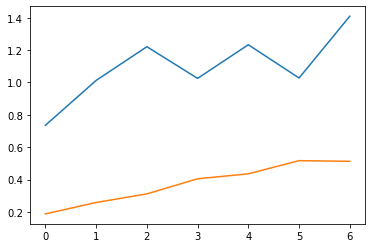

In [25]:
k1_s = np.array((1, 2, 3, 2, 3, 2, 4))
k2_s = np.array((0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7))
w = 0.5
firm1 = [] ; firm2 = []

for firm in range(7):
    f1, f2 = market_outcome(k1_s[firm], k2_s[firm], w)
    firm1.append(f1) ; firm2.append(f2)

plt.plot(firm1) ; plt.plot(firm2) ; plt.show()

##### part(c). 
*Increase the number of firms to 3. Does the number of other firms matter for the decision problem of firm 1?*

In [26]:
# generalise to have as many firms as we would like

def market_outcome_system_many(supplies, ks, w):
    sumsupplies = np.sum(supplies)
    out = np.zeros_like(supplies)
    
    for i in range(len(supplies)):
        temp, lab = supply(sumsupplies - supplies[i], ks[i], w)
        out[i] = temp - supplies[i]
        
    return out

def market_outcome_many(ks, w):
    res = opt.root(market_outcome_system_many, np.ones(len(ks)), args = (ks, w))
    return res.x

# set some capital levels
ks = np.array((1, 2, 3, 2, 3, 2, 4))

x = market_outcome_many(ks, 1) # production levels/supplies of all the firms
check = market_outcome_system_many(x, ks, 1) # should be zero if x is correct

print(x) #; print(check)

<ipython-input-22-1c6c2d593723>:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)


[0.15196366 0.28355168 0.39916115 0.28355168 0.39916115 0.28355168
 0.50232016]
